# Table of Contents
1. Import necessary libraries
2. Read and view the data
3. Explore the data
3. Look at the distribution for each feature
    * 3.1 Plot response variable calculate proportions
    * 3.2 plot all the features comparing them to the target variable class
4. Explore the fraction of males and females that are positive
    * 4.1 Calculate the fraction of females and males that are found positive
    
5. Hypothesis testing for proportion of women to men who are positive
6. Explore how the disease affects different age groups
 * 6.1 Age variable is cut into age categories
 * 6.2 preform a chi2 test to explore the question of is there a connection between the age of an individual and getting the disease.
7. Notes


### 1. Import necessary libraries

In [2]:
#imports
import os
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Read and view the data

In [3]:
#read data
df = pd.read_csv('../fixed data/diabetes_data.csv',index_col=0)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

There is one numeric column, which is the Age column. The rest are discreet variables and they are of type object. The target variable is class, which indicates if the patient was found to be positive or negative

### 3. Explore Data

3.1 Look at the distribution for each feature

In [6]:
#cut df for positive test and negative test
df_new = df.copy()
df_new_pos = df_new[df_new.Class == 'Positive']
df_new_neg = df_new[df_new.Class == 'Negative']
df_new_neg.info()
df_new_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 200 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 200 non-null    int64 
 1   Gender              200 non-null    object
 2   Polyuria            200 non-null    object
 3   Polydipsia          200 non-null    object
 4   sudden weight loss  200 non-null    object
 5   weakness            200 non-null    object
 6   Polyphagia          200 non-null    object
 7   Genital thrush      200 non-null    object
 8   visual blurring     200 non-null    object
 9   Itching             200 non-null    object
 10  Irritability        200 non-null    object
 11  delayed healing     200 non-null    object
 12  partial paresis     200 non-null    object
 13  muscle stiffness    200 non-null    object
 14  Alopecia            200 non-null    object
 15  Obesity             200 non-null    object
 16  Class               200 

In [7]:
#drop age column
sns.set()
df_no_age = df_new.drop(['Age'],axis=1)


### 3.1 plot the response variable

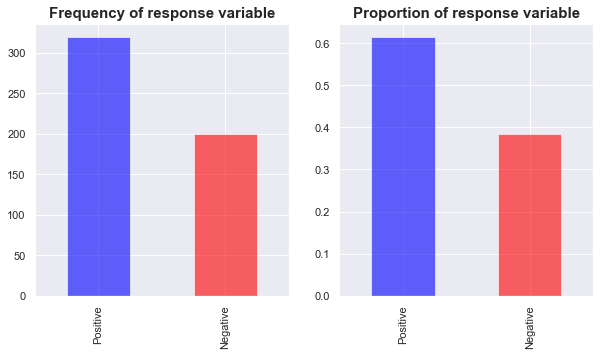

In [29]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))
df['Class'].value_counts().plot(kind='bar', color=['blue','red'], alpha=0.6,ax = ax[0])
ax[0].set_title('Frequency of response variable',fontweight='bold',fontsize=15)

df['Class'].value_counts().div(df['Class'].count()).plot(kind='bar', color=['blue','red'], alpha=0.6,ax =ax[1])
plt.title('Proportion of response variable',fontweight='bold',fontsize=15);


In [12]:
df['Class'].value_counts().div(df['Class'].count())


Positive    0.615385
Negative    0.384615
Name: Class, dtype: float64

In [483]:
#the percentage of positive to negative test results
p_pos = df_no_age.Class[df.Class=='Positive'].count()/df_no_age.Class.count()
p_neg = df_no_age.Class[df.Class=='Negative'].count()/df_no_age.Class.count()
print('Percent of positive tests = ',p_pos, '\nPercent of negative test = ',p_neg)

Percent of positive tests =  0.6153846153846154 
Percent of negative test =  0.38461538461538464


The response variable is a little bit imablanced but not too bad, since this sample was collected from a hospital, it is expected that many patients will be positive

### 3.2 plot all the features comparing them to the target variable class

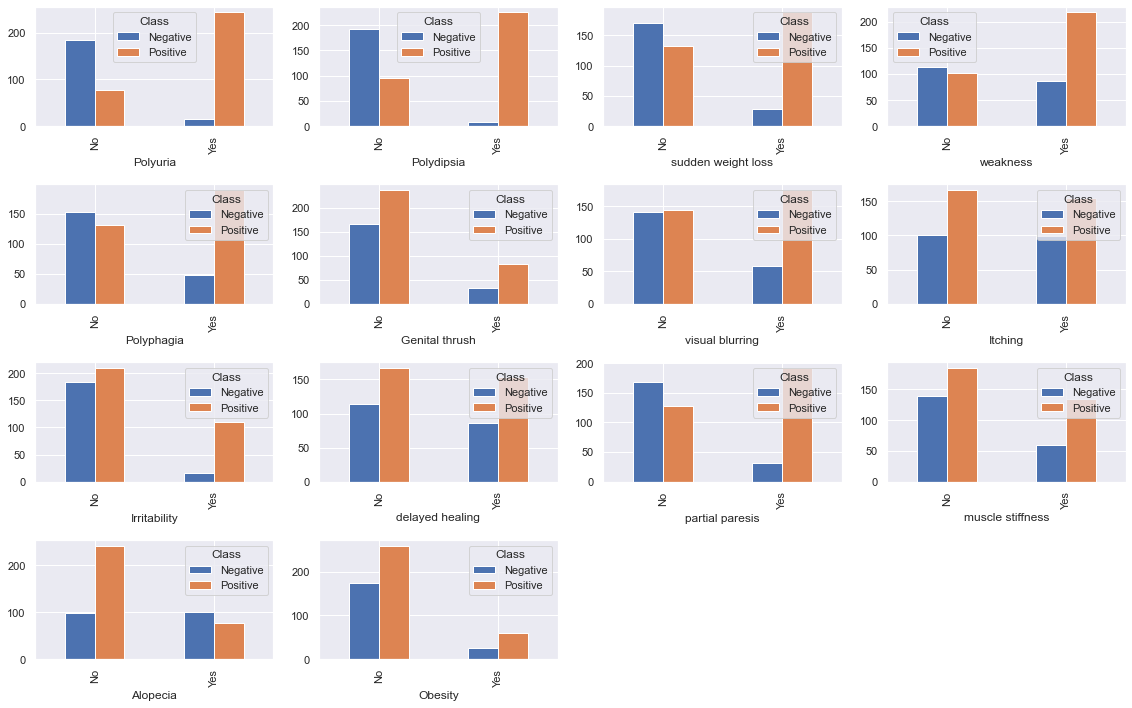

In [482]:

fig,axes = plt.subplots(4,4,figsize=(16,10))
axes = axes.ravel()

for i, c in enumerate(df_no_age.columns[:-1]):
    (df_no_age.groupby([c,'Class'])['Class'].count().unstack()).plot(kind='bar',ax=axes[i])
plt.tight_layout()
axes[-1].axis('off')
axes[-2].axis('off');

#axes[-2].text(.5,300,'Frequency of response variable',
       # horizontalalignment='center',fontweight='bold')

looking at all the tests: it seems that females test more positive for diabetes in this sample. Also polyuria, polydipsia, weakness, visual blurring, and partial paresis are mostly positive for diabetes when the test is positive. The first thing to investigate is how the disease is manifested for males versus females

### 4. Explore the fraction of males and females that are positive

In [30]:
#group dataframe by gender and class and count how many is positive/negative
gender_df = df_new.groupby(['Gender','Class'])['Class'].count().unstack()
gender_df

Class,Negative,Positive
Gender,,
Female,19,173
Male,181,147


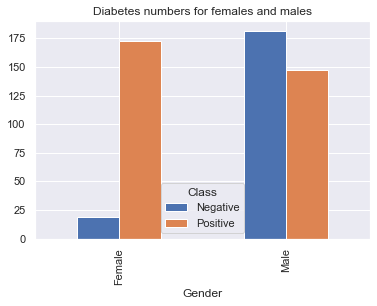

In [11]:
#plot female to male 
gender_df.plot(kind='bar')
plt.title('Diabetes numbers for females and males');

### 4.1 Calculate the fraction of females and males that are found positive

In [31]:
#add a column of total number for each gender
gender_df['total_gender'] = gender_df.sum(axis=1)

gender_df

Class,Negative,Positive,total_gender
Gender,,,
Female,19,173,192
Male,181,147,328


However there is a difference in sample size for males and females, 

In [20]:
#function that takes in positive number of cases and total patients and returns ratio
def calc_ratio(pos, total):
    return pos/total

In [32]:
#fraction of females that are positive
frac_fem = calc_ratio(gender_df.loc['Female']['Positive'],gender_df.loc['Female']['total_gender'])
frac_male = calc_ratio(gender_df.loc['Male']['Positive'],gender_df.loc['Male']['total_gender'])
print('The fraction of females found positive = {0:.2f}'.format(frac_fem))
print('The fraction of males found positive = {0:.2f}'.format(frac_male))

The fraction of females found positive = 0.90
The fraction of males found positive = 0.45


In [33]:
#add proportions to the gender_df
gender_df['proportions_pos'] = frac_fem, frac_male
gender_df

Class,Negative,Positive,total_gender,proportions_pos
Gender,,,,
Female,19,173,192,0.901042
Male,181,147,328,0.448171


In [126]:
gender_df.loc['Female']['proportions_pos']

0.9010416666666666

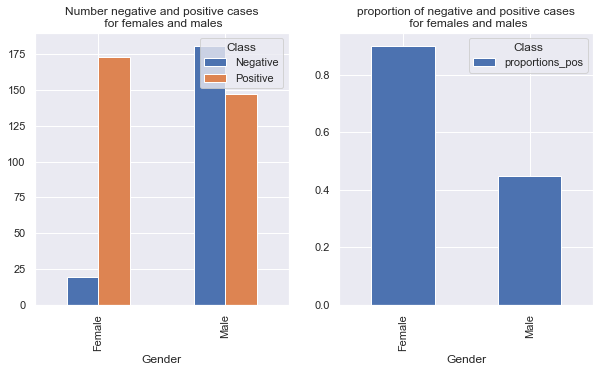

In [165]:
#plot number of negative and positive cases for females and males and their proportions
f,ax = plt.subplots(1,2, figsize = (10,5))
gender_df.drop(['total_gender','proportions_pos'],axis=1).plot(kind='bar',ax=ax[0])
ax[0].set_title('Number negative and positive cases\n for females and males')
gender_df.drop(['Negative','Positive','total_gender'],axis=1).plot(kind='bar',ax=ax[1])
plt.title('proportion of negative and positive cases\n for females and males');


In [43]:
#add total to gender_df
r = gender_df.sum(axis=0)
r.name = 'Total'
gender_df.append(r)

Class,Negative,Positive,total_gender,proportions_pos
Gender,,,,
Female,19.0,173.0,192.0,0.901042
Male,181.0,147.0,328.0,0.448171
Total,200.0,320.0,520.0,1.349212


### 5.Hypothesis testing for proportion of women to men who are positive

The sample data shows a big difference between proportion of positive cases for females and males. Is this difference due to the sample taken or do women actually have a greated chance of getting diabetes than men. To answer this question, we do a hypothesis test. The null hypothesis is that there is no difference between the fraction of men and women who tested positive, and the alternate hypothesis is that women have a greater proprotion of positive tests than men.  
There are a few conditions to be able to use inference on the sample:  
 
    1. random sample: it is assumed that the data is collected randomly. 
    2. normal condition: at least 10 successes and 10 failures, which is true for this samole
    3. independence: sampling with replacement, or sample size is no more than 10% of entire population  

H0: p(fem) = p(male), or p(fem)-p(male) = 0 p is the propotion of positive test  
H1: p(fem) > p(male), or p(fem)-p(male) > 0  

We use 2_sample z_test to see if we should reject H0


In [119]:
from statsmodels.stats.proportion import proportions_ztest

#we are testing if H1>H0, this is a one sided test, so signinficance level = 0.05 for a 95% confidence interval 
significance = 0.05

#number of positive tests for females and males
pos_test = np.array([gender_df.Positive.Female,gender_df.Positive.Male])

#total number of tests for females and males
total_test = np.array([gender_df.total_gender.Female,gender_df.total_gender.Male])

stats,p_value = proportions_ztest(pos_test,total_test,alternative = 'larger')

if p_value < significance:
    print('we reject the null hypothesis because p_value = ',p_value)
if p_value >= significance:
    print('we cannot reject the null hypothsis because p_value = ',p_value)

we reject the null hypothesis because p_value =  6.28971885117494e-25


This dataset was collected from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and in this population  women are at a greater risk of developing diabetes than men.

### 6.Explore if there is a relationship between getting the disease and the age of an individual

Investigate how the disease is manifested for differenct age groups


In [322]:
#copy the dataframe
df_age = df_new.copy()
#create a new column with age intervals
df_age['age_intervals'] = pd.cut(x = df_new['Age'],bins = [20,30,40,50,60,70,110])


df_age.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Class,age_intervals
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,"(30, 40]"
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,"(50, 60]"
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,"(40, 50]"
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,"(40, 50]"
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,"(50, 60]"


#### 6.1  Explore how getting diabetes is related to age. The dataframe is cut into groups of ages  10 to 40, 40 to 50, 50 to 60, 60 to 70 and 70 and higher

In [323]:
#group by class and age intervals
df_age_grouped = df_age.groupby(['age_intervals','Class'])['Class'].count().unstack()
df_age_grouped=df_age_grouped.reset_index()
df_age_grouped.columns.name = ''
df_age_grouped

,age_intervals,Negative,Positive
0,"(20, 30]",30,14
1,"(30, 40]",39,84
2,"(40, 50]",58,87
3,"(50, 60]",49,78
4,"(60, 70]",17,49
5,"(70, 110]",7,7


In [324]:
df_age_grouped['Total'] = df_age_grouped.Positive+df_age_grouped.Negative
df_age_grouped['proportion'] = df_age_grouped.Positive / df_age_grouped.Total
df_age_grouped

,age_intervals,Negative,Positive,Total,proportion
0,"(20, 30]",30,14,44,0.318182
1,"(30, 40]",39,84,123,0.682927
2,"(40, 50]",58,87,145,0.600000
3,"(50, 60]",49,78,127,0.614173
4,"(60, 70]",17,49,66,0.742424
5,"(70, 110]",7,7,14,0.500000


In [325]:
df_age_grouped = df_age_grouped.set_index('age_intervals')
df_age_grouped


,Negative,Positive,Total,proportion
age_intervals,,,,
"(20, 30]",30,14,44,0.318182
"(30, 40]",39,84,123,0.682927
"(40, 50]",58,87,145,0.600000
"(50, 60]",49,78,127,0.614173
"(60, 70]",17,49,66,0.742424
"(70, 110]",7,7,14,0.500000


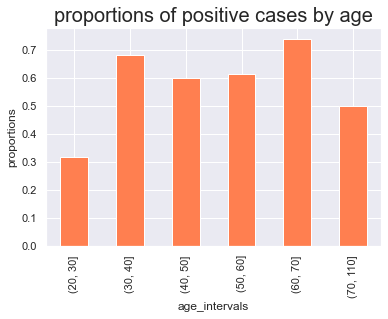

In [326]:
df_age_grouped.proportion.plot(kind='bar',color='coral')
plt.ylabel('proportions')
plt.title('proportions of positive cases by age',fontsize=20);

The highest proportion is in the 60 to 70 years old

### 6.2 preform a chi2 test to explore the question of is there a connection between the age of an individual and getting the disease.



The chi2_contingency function from scipy.stats module computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies. so in this test I am testing if there is a relationship between two or more variables.   
 H0: there is no relationship between age and disease  
 H1: there is a relationship

In [226]:
#import module
from scipy.stats import chi2_contingency



In [327]:
df_age_grouped.head()

,Negative,Positive,Total,proportion
age_intervals,,,,
"(20, 30]",30,14,44,0.318182
"(30, 40]",39,84,123,0.682927
"(40, 50]",58,87,145,0.600000
"(50, 60]",49,78,127,0.614173
"(60, 70]",17,49,66,0.742424


In [330]:
#pivot the table
pivot_t = pd.pivot_table(df_age_grouped, values=['Negative','Positive'],columns ='age_intervals' )
pivot_t

age_intervals,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 110]"
,,,,,,
Negative,30,39,58,49,17,7
Positive,14,84,87,78,49,7


In [331]:

cases = np.array([pivot_t.iloc[0],pivot_t.iloc[1]])
cases

array([[30, 39, 58, 49, 17,  7],
       [14, 84, 87, 78, 49,  7]])

In [332]:
#run the chi squared test
chi_stat, p_value, degrees_of_freedom, expected = chi2_contingency(cases)
chi_stat, p_value

(24.20621432987785, 0.00019817034945512075)

p_value is significant we can reject the null hypothesis and age is a factor in getting the diabetes

_________________________
## Notes:

- The dataset was a bit imbalance which is to be expected since it was collected in a hospital
- Some of the symptoms are more important symptoms than others in telling  if someone is sick, like polyuria, which is increased urination, weakness, polyphagia, which means increased hunger and some of them are not that prevalent for someone who is diabetic, like alopecia, which means hair loss, and obesity.
- there are 192 females and 328 males
- to see if females are more likely to get diabetes I preformed a z_test which gave me a significant p_value. That means that I reject the null hypothesis and conclude that women are at a higher risk of getting sick, however the literature does no support this so I think this i has to do with this dataset.
- The second hypothesis to be tested is if there is a connection between age and getting the disease. To do this I preformed a chi squared test and found it to be significant so age does matter and older people are at a higher risk. 
